<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>October 22, 2016: Horner method, binomial anti-difference
<br>October 9, 2016: computing sums, Stirling numbers, thms coding
<br>October 7, 2016: operators and powers theory
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
In this document we collect notes and exercises for the first chapter of the course.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, k, y

init_printing()

In [2]:
%run src/commons.py

---

In [3]:
delta, antidifference, I, E, f = symbols(r'\Delta \Delta^{-1} I E f', cls=Function) # combinators

In [4]:
I_eval_rule = define(I(x), x) # identity
E_eval_rule = define(E(x),x+1) # forward shift

I_eval_rule, E_eval_rule

In [5]:
delta_eval_rule = define(delta(f(x)), f(x+1)-f(x),) # forward difference def
delta_pow_rule = define(delta(f(x))**k, delta(delta(f(x))**(k-1)),) # repeated applications of differentiation

delta_eval_rule, delta_pow_rule

In [6]:
delta_EI_conv = define(delta(x), E(x)-I(x)) # conversion via combinators

delta_EI_conv

In [7]:
def rewrite(eq, rule, **kwds):
    return eq.replace(query=rule.lhs, value=rule.rhs, **kwds)

In [8]:
s = Wild('s')
rewrite(delta_eval_rule, define(f, Lambda([s], ff(s,n))))

In [9]:
f_wild = WildFunction('f')
D=define(delta(f_wild**k), delta(delta(f_wild**(k-1))))
rewrite(delta_pow_rule, D)

In [10]:
class ForwardDifference(Function):
    
    def _latex(self, *_):
        if len(self.args) < 2:
            func, args = self.args[0].func, self.args[0].args
            v = args[0]
        else:
            func, args = self.args[0].func, self.args[0].args
            v = self.args[1]
            
        D = Function(r'\Delta_{{{}}}'.format(latex(v)))
        expr = D(func(*args))
        return latex(expr)
    
    def doit(self):
        
        if len(self.args) < 2:
            func, args = self.args[0].func, self.args[0].args
            v = args[0]
        else:
            func, args = self.args[0].func, self.args[0].args
            v = self.args[1]
            
        return func(*map(lambda a: a.subs({v:v+1}, simulataneous=True),args)) - func(*args)
                
    def _e2val_power(self, k):
        if k.is_Number:
            return ForwardDifference(Pow(ForwardDifference(self.args), k-1, evaluate=False))
        else:
            return super()._eval_power(k)

# know the difference
Let $\{y_{n}\}_{n\in\mathbb{N}}$ be a sequence, where $y_{n}=f(n)$ for some function $f$. Assume that each coefficient $y_{n}$ *is not known*; on the contrary, assume that there exists a *known* sequence $\{g_{n}\}_{n\in\mathbb{N}}$ which satisfies:
$$
\begin{equation}
\Delta y_{n} = y_{n+1}-y_{n}=g_{n}
\end{equation}
$$
By finite summation on both sides:
$$
\sum_{n=n_{0}}^{N-1}{\Delta y_{n}} = \sum_{n=n_{0}}^{N-1}{g_{n}}
$$
many terms in the lhs disappear, so:
$$
y_{N}-y_{n_{0}} = \sum_{n=n_{0}}^{N-1}{g_{n}}
$$
therefore, if the initial term $y_{n_{0}}$ is given, we can compute any term $y_{N}$ by:
$$
y_{N} = y_{n_{0}} + \sum_{n=n_{0}}^{N-1}{g_{n}}
$$
since each term $g_{n}$ is known by hypothesis and the summation can be done.

## a little generalization

Consider an additional known sequence $\{p_{n}\}_{n\in\mathbb{N}}$ and we're required to find a solution for  equation: $ y_{n+1} = p_{n}y_{n} + g_{n} $. So define an helper sequence $\{P_{n}\}_{n\in\mathbb{N}}$ such that $P_{n_{0}}=1$ and $P_{n}=p_{n-1}P_{n-1}$, therefore $P_{n}=\prod_{k=n_{0}}^{n-1}{p_{k}}$ holds by induction. Now study the following:

$$
    \frac{y_{n+1}}{P_{n+1}} = \frac{p_{n}y_{n}}{P_{n+1}} + \frac{g_{n}}{P_{n+1}} 
    = \frac{y_{n}}{P_{n}} + \frac{g_{n}}{P_{n+1}} 
$$

calling $z_{n}=\frac{y_{n}}{P_{n}}$ and $q_{n}=\frac{g_{n}}{P_{n+1}}$, it yields: $z_{n+1} = z_{n}+q_{n}$, with initial condition $z_{n_{0}} = \frac{y_{n_{0}}}{P_{n_{0}}} = y_{n_{0}}$. So we've a recurrence in a simpler form, whose solution is a sequence $\{z_{n}\}_{n\in\mathbb{N}}$ such that $z_{n} = z_{n_{0}} + \sum_{i=n_{0}}^{n-1}{q_{i}}$. By backward substitution:

$$
\begin{split}
    \frac{y_{n}}{P_{n}} &= y_{n_{0}} + \sum_{i=n_{0}}^{n-1}{\frac{g_{i}}{P_{i+1}}} \\
    y_{n} &= P_{n}y_{n_{0}} + \sum_{i=n_{0}}^{n-1}{\frac{P_{n}g_{i}}{P_{i+1}}} \\
    y_{n} &= \left(\prod_{k=n_{0}}^{n-1}{p_{k}}\right)y_{n_{0}} + 
        \sum_{i=n_{0}}^{n-1}{\left(\prod_{k=i+1}^{n-1}{p_{k}}\right)g_{i}} \\
\end{split}
$$

which is the closed form for coefficients of solution sequence $\{y_{n}\}_{n\in\mathbb{N}}$.

### Horner method

Let $p\in\prod_{n}$ be a polynomial over coefficients $\{b_{n}\in\mathbb{C}\}_{n\in\mathbb{N}}$, defined as $p(x)=\sum_{i=0}^{n}{b_{i}x^{n-i}}$. Define the difference equation $y_{i} = xy_{i-1} + b_{i}$, for $i\in\{1,\ldots,n\}$, with initial condition $y_{0}=b_{0}$; therefore, $y_{n}=p(x)$ holds.

In order to see this, recognize that we have a recurrence of the last form where $p_{i}=x$ and $g_{i}=b_{i+1}$ forall $i$ in the domain, therefore its solution has the generic coefficient $y_{n}$ which satisfies:

$$
    y_{n} = \left(\prod_{k=n_{0}}^{n-1}{x}\right)b_{0} + 
        \sum_{i=n_{0}}^{n-1}{\left(\prod_{k=i+1}^{n-1}{x}\right)b_{i+1}}
        = x^{n}b_{0} + \sum_{i=0}^{n-1}{x^{n-1-(i+1)+1}b_{i+1}} =
        = x^{n}b_{0} + \sum_{i=1}^{n}{x^{n-i}b_{i}} = \sum_{i=0}^{n}{x^{n-i}b_{i}} = p(x)
$$

as required.

# $\Delta$ operator relations

On the other hand, assume that no initial condition $y_{n_{0}}$ is given, we obtain $y_{n}$ on the lhs by application of the *anti-difference* operator $\Delta^{-1}$ on the left in both members $\Delta y_{n}=g_{n}$ so 
$y_{n} = \Delta^{-1}g_{n}$. Use this identity as rewriting rule and apply it to the former equation, obtaining $\Delta\Delta^{-1}g_{n}=g_{n}$, therefore the relation $\Delta\Delta^{-1}=I$ on operators holds.

Moreover, let $\{w_{n}\}_{n\in\mathbb{N}}$ be a constant sequence, so we can augment:
$$
y_{n} = \Delta^{-1}g_{n} + w_{n} = \Delta^{-1}\Delta y_{n} + w_{n}
$$
because $\Delta w_{n}=0$, therefore the relation $\Delta^{-1}\Delta = I - K$, where $K$ is the constant operator, holds.

# computing sums via $\Delta^{-1}$

Let $g_{n}=\Delta y_{n}$ and assume to *not* have a closed formula in $n$ for coefficients $y_{n}$, but to *know* that $y_{n}=\Delta^{-1}g_{n}$ holds. Apply summation on both members and manipulating on the rhs:
$$
\sum_{n=n_{0}}^{N-1}{g_{n}} = \sum_{n=n_{0}}^{N-1}{\Delta y_{n}} 
= y_{N}-y_{n_{0}} =  y_{n} \big|_{n_{0}}^{N} = \Delta^{-1}g_{n} \big|_{n_{0}}^{N} = \Delta^{-1}g_{n} \big|_{n=N} - \Delta^{-1}g_{n} \big|_{n=n_{0}}
$$
therefore, if we have an *unknown* sequence $\{g_{n}\}_{n\in\mathbb{N}}$, which has a closed-form of 
$\Delta^{-1}g_{n}$ as a term which support *substitution* of symbol $n$, so the sum $\sum_{n=n_{0}}^{N-1}{g_{n}}$ can be easily computed by a difference, as done in the fundamental theorem of calculus.

In [79]:
g = IndexedBase('g')
n = IndexedBase('n')
f = Function('f')

anti_difference = Function('\Delta^{-1}')

def accept_replacing(thm_ctor):
    
    def replacing(subs=lambda *args: {}, **kwds):
    
        weq, variables = thm_ctor(**kwds)
        mapping = subs(*variables) if callable(subs) else subs
        for k,v in mapping.items():
            weq = weq.replace(k, v, simultaneous=True)
        
        return weq, [mapping.get(v, v) for v in variables]
        
    return replacing
        
@accept_replacing
def summation_antidifference_thm():

    (n, sup), inf = symbols('n N'), IndexedBase('n')[0]
    eq = Eq(Sum(g[n], (n, inf, sup-1)), 
            Subs(anti_difference(g[n]), n, sup) - 
            Subs(anti_difference(g[n]), n, inf))
    
    return eq, (g, n, inf, sup)

@accept_replacing
def antidifference_of_ff_thm():
    (n, i), w = symbols('n i'), IndexedBase('w')
    eq = Eq(anti_difference(ff(n, i)), ff(n, i+1)/(i+1)+w[n])
    return eq, (x, n, w)

@accept_replacing
def antidifference_of_binomial_thm():
    (n, k), w = symbols('n k'), IndexedBase('w')
    eq = Eq(anti_difference(binomial(n, k)), binomial(n, k+1)+w[n])
    return eq, (x, n, w)

@accept_replacing
def constant_sequence_thm():
    variables = w, i, j = IndexedBase('w'), *symbols('i j')
    eq = Eq(w[i], w[j])
    return eq, (w, i, j)

def doit(thm, lhs=True, rhs=True):
    eq, *variables = thm
    return Eq(eq.lhs.doit() if lhs else eq.lhs, eq.rhs.doit() if rhs else eq.rhs), variables

def rewrite(thm, rule, include_rule_vars=False):

    eq, *rest = thm
    try:
        rw, *others = rule # so, `rule` can be a thm too
    except:
        rw, *others = rule, []
    
    augmented = []
    augmented.extend(*rest)
    if include_rule_vars: augmented.extend(*others)
    return eq.replace(rw.lhs, rw.rhs, simultaneous=True), augmented



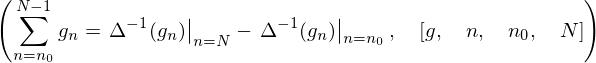

In [5]:
thm = eq, (g, n, inf, sup) = summation_antidifference_thm()
thm

## $(x)_{i}$ application

In [6]:
local_thm = Eq(g[n], ff(n,i)), (g, n, i)
local_thm

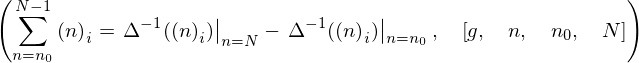

In [7]:
inst_thm = rewrite(thm, local_thm)
inst_thm

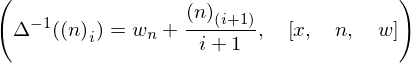

In [8]:
ant_ff_thm = antidifference_of_ff_thm(subs={})
ant_ff_thm

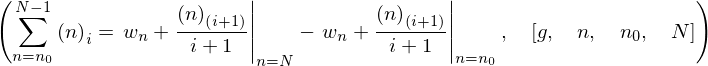

In [9]:
ready_thm = eq, *_ = rewrite(inst_thm, ant_ff_thm)
ready_thm

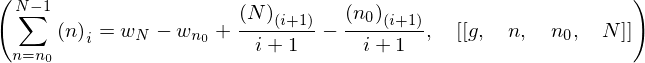

In [10]:
done_thm = doit(ready_thm, lhs=False)
done_thm

## ${{n}\choose{k}}$ application

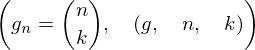

In [11]:
local_thm = Eq(g[n], binomial(n,k)), (g, n, k)
local_thm

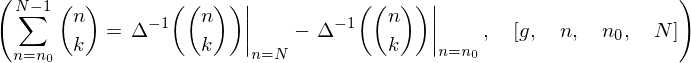

In [12]:
inst_thm = rewrite(thm, local_thm)
inst_thm

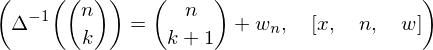

In [15]:
ant_binomial_thm = antidifference_of_binomial_thm(subs={})
ant_binomial_thm

Previous thm holds by the following argument.

$$
\begin{split}
    \Delta{{x}\choose{j}} = {{x+1}\choose{j}} - {{x}\choose{j}} &= \frac{(x+1)_{j}}{(j)_{j}}-\frac{(x)_{j}}{(j)_{j}}\\
    &= \frac{ (x+1)x\cdots(x-j+2) -x\cdots(x-j+2)(x-j+1) }{(j)_{j}}\\
    &= \frac{ x\cdots(x-j+2)(x+1 -(x-j+1)) }{(j)_{j}}\\
    &= \frac{ x\cdots(x-j+2) }{(j-1)!} =  \frac{ (x)_{(j-1)} }{(j-1)_{(j-1)}} =  {{x}\choose{j-1}}\\
\end{split}
$$

therefore, to find $\Delta^{-1}{{x}\choose{j}}$ we are required to provide a term $t_{x}$ such that application of $\Delta$ to it yields ${{x}\choose{j}}$. So choose $t_{x}={{x}\choose{j+1}}$, according to above identity.

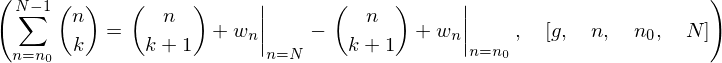

In [16]:
ready_thm = eq, *_ = rewrite(inst_thm, ant_ff_thm)
ready_thm

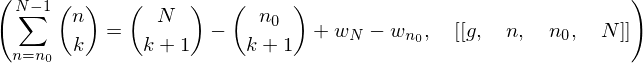

In [17]:
done_thm = doit(ready_thm, lhs=False)
done_thm

In [32]:
ff(x+1,i)-ff(x,i)

# powers

## in $\mathbb{R}$

In $\mathbb{R}$ the $n$-th power of the symbol $x$ satisfies:
$$
\begin{split}
x^{0}&=1 \\
x \neq0 &\rightarrow x^{-n}=\frac{1}{x^{n}}\\
\frac{\partial x^{n}}{\partial{x}} &= n x^{n-1} \\
\frac{\partial^{-1} x^{n}}{\partial{x}} = \int x^{n}\partial x &= \frac{x^{n+1}}{n+1}+c
\end{split}
$$
for some $c\in\mathbb{R}$. In $\mathbb{N}$ its counterpart is the *falling factorial* function in the variable $x$ defined as: 

$$(x)_{n} = \underbrace{x(x-1)(x-2)\cdots(x-n+1)}_{n\text{ terms}}$$

## in $\mathbb{N}$

We apply operator $\Delta$ to derive an identity about forward differences of $(x)_{n}$: 
$$
\begin{split}
\Delta (x)_{n} &= (x+1)_{n} - (x)_{n} \\
&= (x+1)x(x-1)\cdots(x-n+2) - x(x-1)\cdots(x-n+2)(x-n+1) \\
&= (x)_{(n-1)}(x+1 -(x-n+1)) \\
&=n(x)_{(n-1)}
\end{split}
$$
Previous identity allows us to recover the *anti-difference* of $(x)_{n}$: it requires to find a sequence $\{g_{n}\}_{n\in\mathbb{N}}$ such that $\Delta g_{n} = (x)_{n}$, namely $$g_{n}=\frac{(x)_{(n+1)}}{n+1}+w_{n}=\Delta^{-1}(x)_{n}$$ where $\{w_{n}\}_{n\in\mathbb{N}}$ is a constant sequence.

Moreover, in order to provide corresponding identities for the left ones, we reason according to:
$$
(x)_{m+n} = \underbrace{x(x-1)\cdots(x-m+1)}_{(x)_{m}}\underbrace{(x-m)(x-m-1)\cdots(x-m-n+1)}_{(x-m)_{n}}
$$
substitution $m=0$ yields $(x)_{n}=(x)_{0}(x)_{n}$ therefore $(x)_{0}=1$. On the other hand, substitution $m=-n$ yields $(x)_{0}=(x)_{-n}(x+n)_{n}$. So:
$$
(x+n)_{n} \neq 0 \rightarrow (x)_{-n} = \frac{1}{(x+n)_{n}} = \frac{1}{(x+n)(x+n-1)\cdots(x+1)}
$$
requiring $x\not\in\{-1, -2, \ldots, -n\}$.

## properties

- $(x)_{n}$ is monic polynomial of degree $n$ with roots $\{0, 1, \ldots, n-1\}$
- $\Delta(x)_{n}\in\Pi_{n-1}$
- $\Delta^{-1}(x)_{n}\in\Pi_{n+1}$
- $k < j \rightarrow (k)_{j} = k(k-1)\cdots(k-k)\cdots(k-j+1)=0$
- $(k)_{k} = k(k-1)\cdots(k-(k-1)+1)(k-k+1)=k!$
- $(k)_{k}=(k)_{(k-1)}$

and, finally:

$$\frac{(k)_{j}}{(j)_{j}} = \frac{k(k-1)\cdots(k-j+1)}{j!}=\frac{k!}{j!(k-j)!}={{k}\choose{j}}$$

## $\mathbb{R} \leftarrow \mathbb{N}$, via Stirling numbers of the *second* type

In [3]:
from sympy.functions.combinatorial.numbers import stirling

The following identity links the two kinds of powers:
$$
x^{n} = \sum_{i=1}^{n}{\mathcal{S}_{n,i} (x)_{i}}
$$
where coefficients $\mathcal{S}_{n,i}$ are Stirling's numbers of the second kind, defined according to the following recurrence relation $\mathcal{S}_{n+1, i} = \mathcal{S}_{n, i-1} + i\mathcal{S}_{n, i}$, for $i\in\{2,\ldots,n\}$, with initial conditions $\mathcal{S}_{n, 1} = \mathcal{S}_{n, n} = 1$.

In the following matrix we report the upper chunk of the infinite matrix generated by the recurrence relation; for the sake of clarity, according to Python indexing which is *zero*-based, we include the very first row and column, which yields $\mathcal{S}_{0, 0}=1$ and $0$ everywhere else.

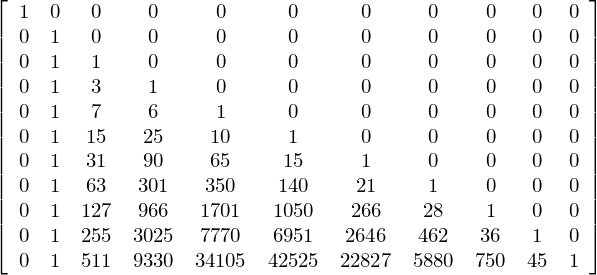

In [4]:
stirling_matrix_second_kink = Matrix(11,11,lambda i, j: stirling(i,j, kind=2, signed=False))
stirling_matrix_second_kink

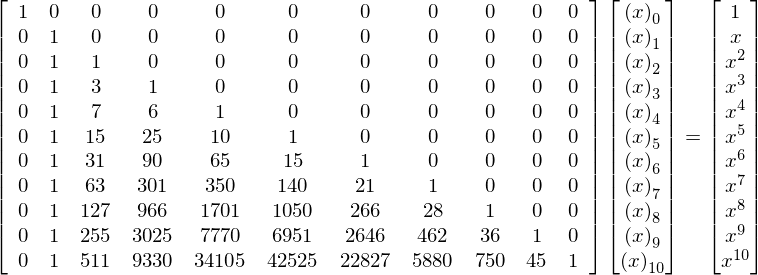

In [22]:
m = Mul(stirling_matrix_second_kink, Matrix(11,1,lambda i, _: ff(x, i, evaluate=False)),evaluate=False)
#.applyfunc(lambda i: i.as_poly(x).as_expr())
Eq(m, Matrix(11,1,lambda i, _: x**i), evaluate=False)

In [23]:
_.lhs.doit()

AttributeError: ImmutableDenseMatrix has no attribute as_base_exp.

__Proof.__ By induction on $n$.

Base case $n=1$, so $x = \mathcal{S}_{1,1}(x)_{1}=x$, which holds.

Assume the theorem true for $n$ and show for $n+1$, so:
$$
\begin{split}
    x^{n+1} = x\cdot x^{n} &= x\sum_{i=1}^{n}{\mathcal{S}_{n,i} (x)_{i}}
    = \sum_{i=1}^{n}{\mathcal{S}_{n,i} (x-i+i) (x)_{i}}
    = \sum_{i=1}^{n}{\mathcal{S}_{n,i}\left(\underbrace{(x-i) (x)_{i}}_{(x)_{(i+1)}} + i (x)_{i} \right)}\\
    &= \sum_{i=2}^{n+1}{\mathcal{S}_{n,i-1} (x)_{i}} + \sum_{i=1}^{n}{i \mathcal{S}_{n,i} (x)_{i}}
    = \underbrace{\mathcal{S}_{n,1}}_{\mathcal{S}_{n+1,1}} (x)_{1} + 
        \sum_{i=2}^{n}{\underbrace{\left(\mathcal{S}_{n,i-1}+i\mathcal{S}_{n,i}\right)}_{\mathcal{S}_{n+1,i}} (x)_{i}} +
        \underbrace{\mathcal{S}_{n,n}}_{\mathcal{S}_{n+1,n+1}} (x)_{n+1}
    = \sum_{i=1}^{n+1}{\mathcal{S}_{n+1,i} (x)_{i}}
\end{split}
$$
as required. $\blacksquare$

The just proved identity allows us to easily compute summations of the form $\sum_{x=n_{0}}^{N-1}{x^{k}}$, for some $k\in\mathbb{N}$. One way to do this is to use the result seen some cells above, where it is required to know $\Delta^{-1}x^{k}$:
$$
    \sum_{x=n_{0}}^{N-1}{x^{k}} = \Delta^{-1}x^{k} \big|_{x=N} - \Delta^{-1}x^{k} \big|_{x=n_{0}}
$$
but such anti-difference is unknown. Therefore put the last identity in:
$$
\sum_{x=n_{0}}^{N-1}{x^{k}} = \sum_{x=n_{0}}^{N-1}{\sum_{i=1}^{k}{\mathcal{S}_{k,i} (x)_{i}}} =
\sum_{i=1}^{k}{\mathcal{S}_{k,i}\sum_{x=n_{0}}^{N-1}{ (x)_{i}}} = \sum_{i=1}^{k}{\mathcal{S}_{k,i}\left(\frac{{\left(N\right)}_{\left(i + 1\right)}}{i + 1} - \frac{{\left(n_{0}\right)}_{\left(i + 1\right)}}{i + 1}\right)}
$$
where we recognize $\sum_{n=n_{0}}^{N - 1} {\left(n\right)}_{i} = w_{N} - w_{n_{0}} + \frac{{\left(N\right)}_{\left(i + 1\right)}}{i + 1} - \frac{{\left(n_{0}\right)}_{\left(i + 1\right)}}{i + 1}$ where $w_{N}-w_{n_{0}}=0$ since $\{w_{n}\}_{n\in\mathbb{n}}$ is a constant sequence.

### applications

In [138]:
def power_summation_thm():
    n, S, (N, x, k, i) = IndexedBase('n'), IndexedBase('\mathcal{S}'), symbols('N x k i')
    inf, sup = n[0], N-1
    return (Eq(Sum(x**k, (x, inf, sup)), Sum(s[k,i]*((ff(sup+1, i+1)/(i+1))-(ff(inf, i+1)/(i+1))), (i, 1, k))),
            [n, S, inf, sup, N, x, k, i])

def expand_Sum(aSumExpr):
    
    generic_sum_coeff, (sum_index, starting_bound, ending_bound) = aSumExpr.args
    
    summands = [generic_sum_coeff.subs(sum_index, n) for n in range(starting_bound, ending_bound+1)]
    result = Add(*summands, evaluate=False)
        
    return result

def stirling_row(row, indexed=None, *args, **kwds):
    return {indexed[row, i] if indexed else (row,i):stirling(row, i, *args, **kwds) for i in range(row+1)}

def do_powers_summation(power, bottom=1, top=Symbol('n'), expand=True):
    eq, (n, S, inf, sup, N, x, k, i) = power_summation_thm()
    inst_eq = eq.subs({inf:bottom, k:power, N:top+1}, simultaneous=True)
    rhs = expand_Sum(inst_eq.rhs)
    rhs = rhs.subs(stirling_row(power, S)).factor() if expand else rhs
    return Eq(inst_eq.lhs, rhs)
    

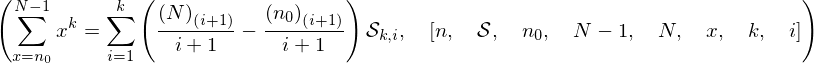

In [139]:
power_summation_thm()

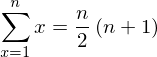

In [140]:
do_powers_summation(power=1, bottom=1)

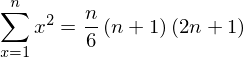

In [131]:
do_powers_summation(power=2, bottom=1)

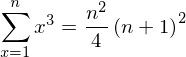

In [132]:
do_powers_summation(power=3, bottom=1)

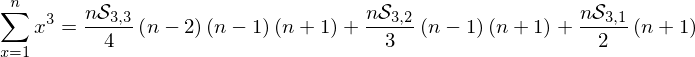

In [133]:
do_powers_summation(power=3, bottom=1, expand=False)

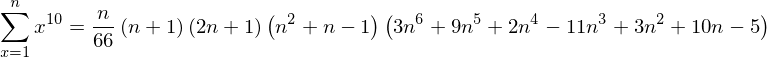

In [134]:
ten_powers = do_powers_summation(power=10)
ten_powers

In [135]:
ten_powers.replace(Symbol('n'),20).doit()

## $\mathbb{R} \rightarrow \mathbb{N}$, via Stirling numbers of the *first* type

It is possible to revert the previous argument and find a characterization for $(x)_{i}$ using powers $x^{i}$ as follows: 
$$
\sum_{i=1}^{n}{\mathcal{s}_{n,i} x^{i}} = (x)_{n}
$$
where coefficients $\mathcal{s}_{n,i}$ are Stirling's numbers of the first kind, tabulated in the following matrix:

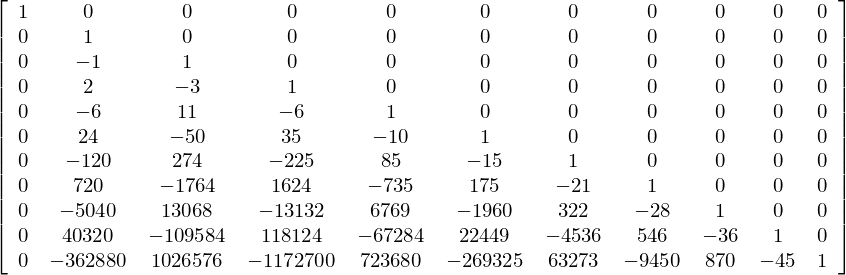

In [38]:
stirling_matrix_first_kink = Matrix(11,11,lambda i, j: stirling(i,j, kind=1, signed=True))
stirling_matrix_first_kink

Stirling's matrices of numbers are inverses the one of the other, namely:

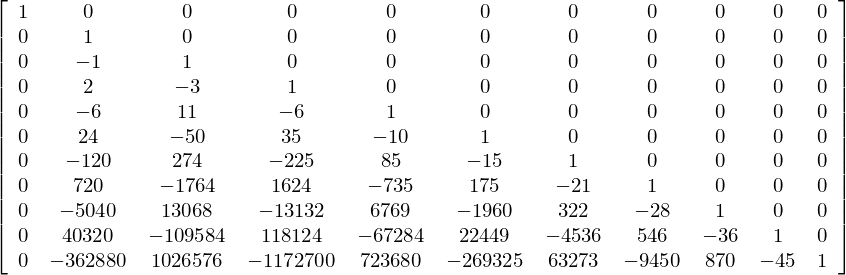

In [118]:
stirling_matrix_second_kink**(-1)

therefore their product yields the identity matrix:

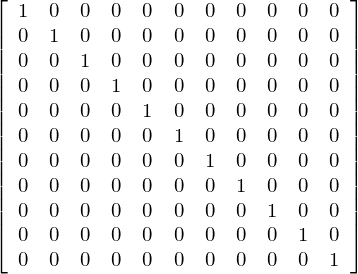

In [39]:
stirling_matrix_second_kink*stirling_matrix_first_kink

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.